Ordenar as observações de forma ascendente temporalmente (da observação mais 
antiga para a observação mais recente).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).
df_ovnis = pd.read_csv("df_OVNI_preparado.csv", index_col=[0])

#Cria um novo dataframe com os dados da cidade de Phoenix
df_ovnis = df_ovnis[df_ovnis['City']=='Phoenix']

#agrupa por data
df_views = df_ovnis
df_views['Views'] = df_views.groupby('Sight_Date')['Sight_Date'].transform('count')

#Excluir as colunas cujo os dados não são necessários
df_views = df_views.drop(columns=["Sight_Month"])
df_views = df_views.drop(columns=["Sight_Day"])
df_views = df_views.drop(columns=["Sight_Weekday"])
df_views = df_views.drop(columns=["Shape"])
df_views = df_views.drop(columns=["State"])
df_views = df_views.drop(columns=["City"])
df_views = df_views.drop(columns=["Sight_Time"])
df_views.sort_values(by='Sight_Date')

,Sight_Date,Views
335,1999-06-12,1
970,2001-11-12,1
1249,2003-05-31,1
1781,2005-02-21,1
1793,2005-03-20,1
...,...,...
70762,2017-06-15,2
71348,2017-07-06,1
71057,2017-07-26,1
71857,2017-08-04,1


Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.
Exemplo com o ano de 2017

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


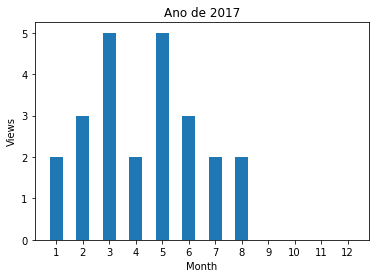

In [100]:
#Atribui o daframe a uma outro para manipulção mais livre
df_mes = df_ovnis
#Define o ano que quer ser visto no grafico
ano = 2017

#Transforma a coluna 'Sight_Date' em formato de data para separar o ano
df_mes['Sight_Date'] = pd.to_datetime(df_mes['Sight_Date'])
#Separa o ano em uma coluna propria
df_mes['Sight_Year'] = df_mes['Sight_Date'].dt.strftime('%Y')
#transforma o ano em string
df_mes = df_mes[df_ovnis['Sight_Year'] == str(ano)]
#Conta quantas visualizacoes cada mes tem
df_mes["Views"] = df_mes.groupby('Sight_Month')['Sight_Month'].transform('count')

#cria um vetor com todos os meses do ano
mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#cria um vetor vazio que tera as views de cada mes
views = []

#no primeiro for ele vai rodar todos os 12 meses
for j in mes:
  #flag para nao duplicar o numero de views de meses repetidos
  flag = 0
  #segundo for que ira interar linha por linha do dataframe
  for i in df_mes.itertuples():
    if(df_mes.Sight_Month[i.Index] == j and flag == 0):
      #atribui o numero do mes correspondente (representado pelo j)
      views.append(df_mes.Views[i.Index])
      flag = 1

#preenche os meses cujo n tiveram observacoes registradas com o valor zero
if(len(views) < 12):
  meses_sem_views = 12 - len(views)
  for i in range(meses_sem_views):
    views.append(0)

#----PLOTANDO O GRAFICO-----

#cria distancia entre as barras
x1 =  np.arange(len(views))

# Plota as barras
plt.bar(x1, views, width=0.5, label = 'Produto A')

# coloca o nome dos meses como label do eixo x
plt.xticks([x for x in range(len(views))], mes)

plt.title("Ano de "+ str(ano))
plt.xlabel('Month')
plt.ylabel('Views')
plt.show()

Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos).

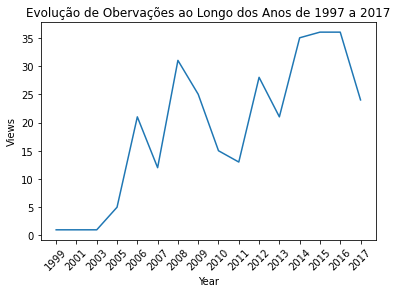

In [154]:
#Atribui o daframe a uma outro para manipulção mais livre#Atribui o daframe a uma outro para manipulção mais livre
df_anos = df_ovnis

#Array vazio que tera os anos de 1997 a 2017
anos = []
#Array vazio que tera as views correspondennte ao periodo pedido
views = []
#Anos que aparecerao no grafico
anos_grafico = []

#Transforma a coluna 'Sight_Date' em formato de data para separar o ano
df_anos['Sight_Date'] = pd.to_datetime(df_anos['Sight_Date'])
#Separa o ano em uma coluna propria
df_anos['Sight_Year'] = df_anos['Sight_Date'].dt.strftime('%Y')
#Conta quantas visualizacoes cada ano tem
df_anos["Views"] = df_anos.groupby('Sight_Year')['Sight_Year'].transform('count')

#intera os anos de 1997 a 2017 no array 'anos'
for i in range(1997, 2018):
  anos.append(i)

#no primeiro for ele vai rodar todos os os anos que o array rececbeu
for j in anos:
  #flag para nao duplicar o numero de views de anos repetidos
  flag = 0
  #segundo for que ira interar linha por linha do dataframe
  for i in df_anos.itertuples():
    if(df_anos.Sight_Year[i.Index] == str(j) and flag == 0):
      #atribui o ano correspondente a view adicionada
      anos_grafico.append(str(j))
      #atribui o numero do ano correspondente (representado pelo j)
      views.append(df_anos.Views[i.Index])
      flag = 1

#Atribui o 'anos_grafico' como anos do eixo x e as views no eixo y
plt.plot(anos_grafico, views)
plt.xlabel('Year')
plt.ylabel('Views')
plt.title("Evolução de Obervações ao Longo dos Anos de 1997 a 2017")
plt.xticks(rotation=45)

plt.show()